<center><h1><font style="color:red;">ASSIGNMENT 5</font></h1><br></center>
<h3>

* Name : Achal Rajesh Mate
* Roll No : 2203541
* Enroll No : MITU20BTCSD001
* Branch : CSE
* Class : TY CSE Is - 3
* Guided By : Prof Nagesh Jadhav Sir

<h3><font style="color:red;">Title:- </font>
   Implement SVM Classifier or Regression for any dataset
</h3>

<h3><font style="color:red;">Objectives:- </font> <br>
1. To learn SVM and kernel functions<br>
2. To implement SVM classifier
 </h3>

<h3><font style="color:red;">Theory:</font></h3>

### Support Vector Machine
* A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonliner classification, regression, and even outlier detection.
* Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. 
* Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.
* The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

### HyperPlane

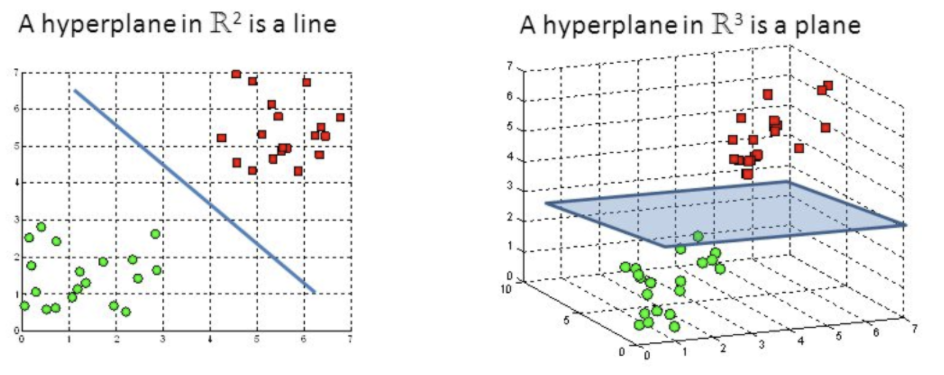
* Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. 
* If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

### Support Vector

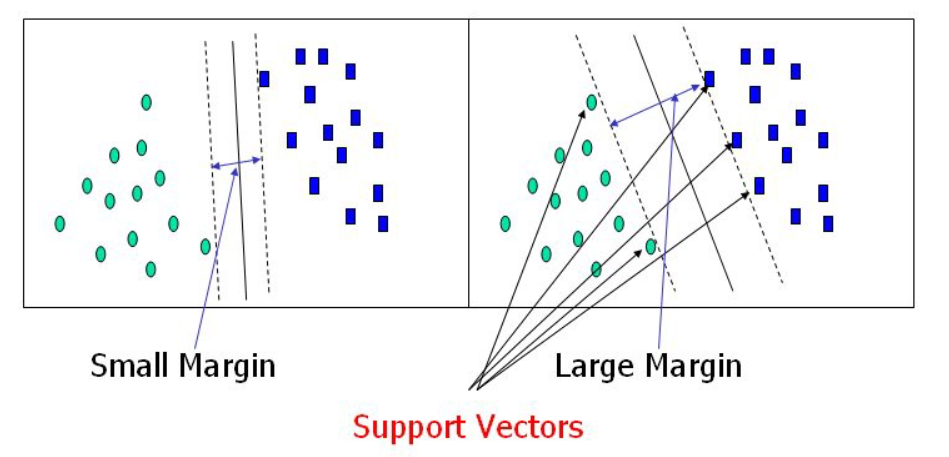
Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

### Margin
A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.

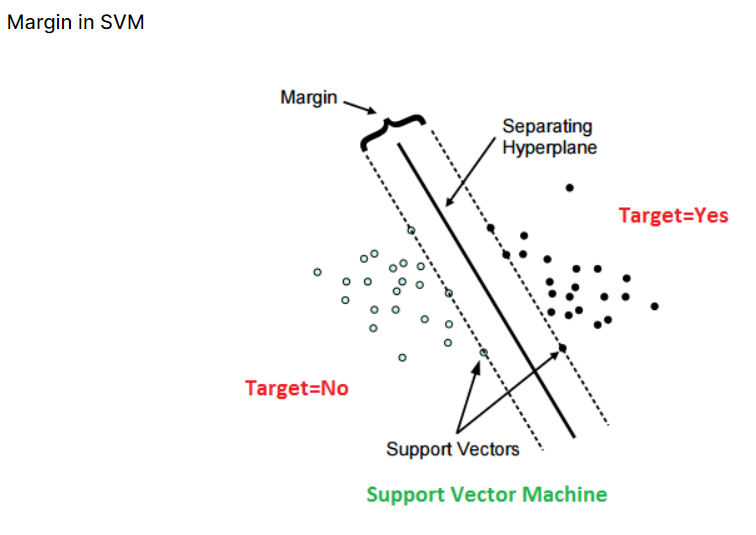

### Kernel trick 
In practice, SVM algorithm is implemented using a kernel. It uses a technique called the kernel trick. In simple words, a kernel is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

We can define a kernel function as follows-
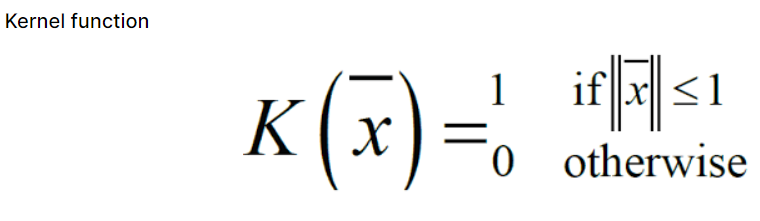

In the context of SVMs, there are 4 popular kernels – Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel (also called Gaussian kernel) and Sigmoid kernel. 

### SVM Kernels

* The SVM algorithm is implemented in practice using a kernel. 
* A kernel transforms an input data space into the required form. 
* Kernel Functions only calculate the relationships between every pair of points as if they are in the higher dimensions, the do not actually do the transformation. This is called Kernel Trick. 
* In other words, we can say that it converts nonseparable problem to separable problems by adding more dimension to it. 
* It is most useful in non-linear separation problem. Kernel trick helps us to build a more accurate classifier.

### Some Kernels

#### Linear Kernel: 

* A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

  * K(x, xi) = sum(x * xi)

#### Polynomial Kernel: 
* A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

  * K(x,xi) = 1 + sum(x * xi)^d (Where d is the degree of the polynomial)

#### Radial Basis(Gaussion) Function Kernel: 
* The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

  * K(x,xi) = exp(-gamma * sum((x – xi^2))

Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.



<b>Problem Statement </b>-  Gender Recognition by Voice.<br>
<b>Dataset Name </b>- Gender Recognition by Voice Dataset.Kaggle<br>
<b>Dataset Link </b> - https://www.kaggle.com/datasets/primaryobjects/voicegender <br>
<b>Dataset Information </b>: <br>
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.. <br>
<b>Features Explanations:</b>
* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female
    

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score,roc_auc_score
from sklearn import metrics

In [3]:
from scipy import stats
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

### Read Dataset

In [4]:
df =pd.read_csv('voice.csv')

### View Top 5 Rows

In [5]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

### View Last 5 rows

In [6]:
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

### Dimensions of the Dataset

In [7]:
df.shape

(3168, 21)

#### This dataset contains 3168 rows and 21 columns target feature

### Columns in dataset

In [8]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

### Concise Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

#### From above observation we can say that no null values in the dataset ,but lets varify by using pandas functions


### Check Missing values

In [10]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### Dataset does not contain any null values

### Check Duplicate Value

In [11]:
df[df.duplicated()]

meanfreq        sd    median       Q25       Q75       IQR      skew  \
298   0.213732  0.057705  0.242573  0.141701  0.257984  0.116283  2.113598   
2403  0.212190  0.043190  0.215153  0.188957  0.245644  0.056687  1.862573   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
298   7.890927  0.859712  0.084934  ...  0.213732  0.133667  0.028319   
2403  6.109790  0.877669  0.314398  ...  0.212190  0.139942  0.047198   

        maxfun   meandom    mindom     maxdom    dfrange   modindx   label  
298   0.253968  0.818125  0.132812   4.164062   4.031250  0.229051    male  
2403  0.279070  1.925551  0.023438  15.609375  15.585938  0.121344  female  

[2 rows x 21 columns]

#### two duplicate row ,Just Drop That duplicate row

In [12]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [13]:
df.shape

(3166, 21)

### View Relationship between Data point in dataset

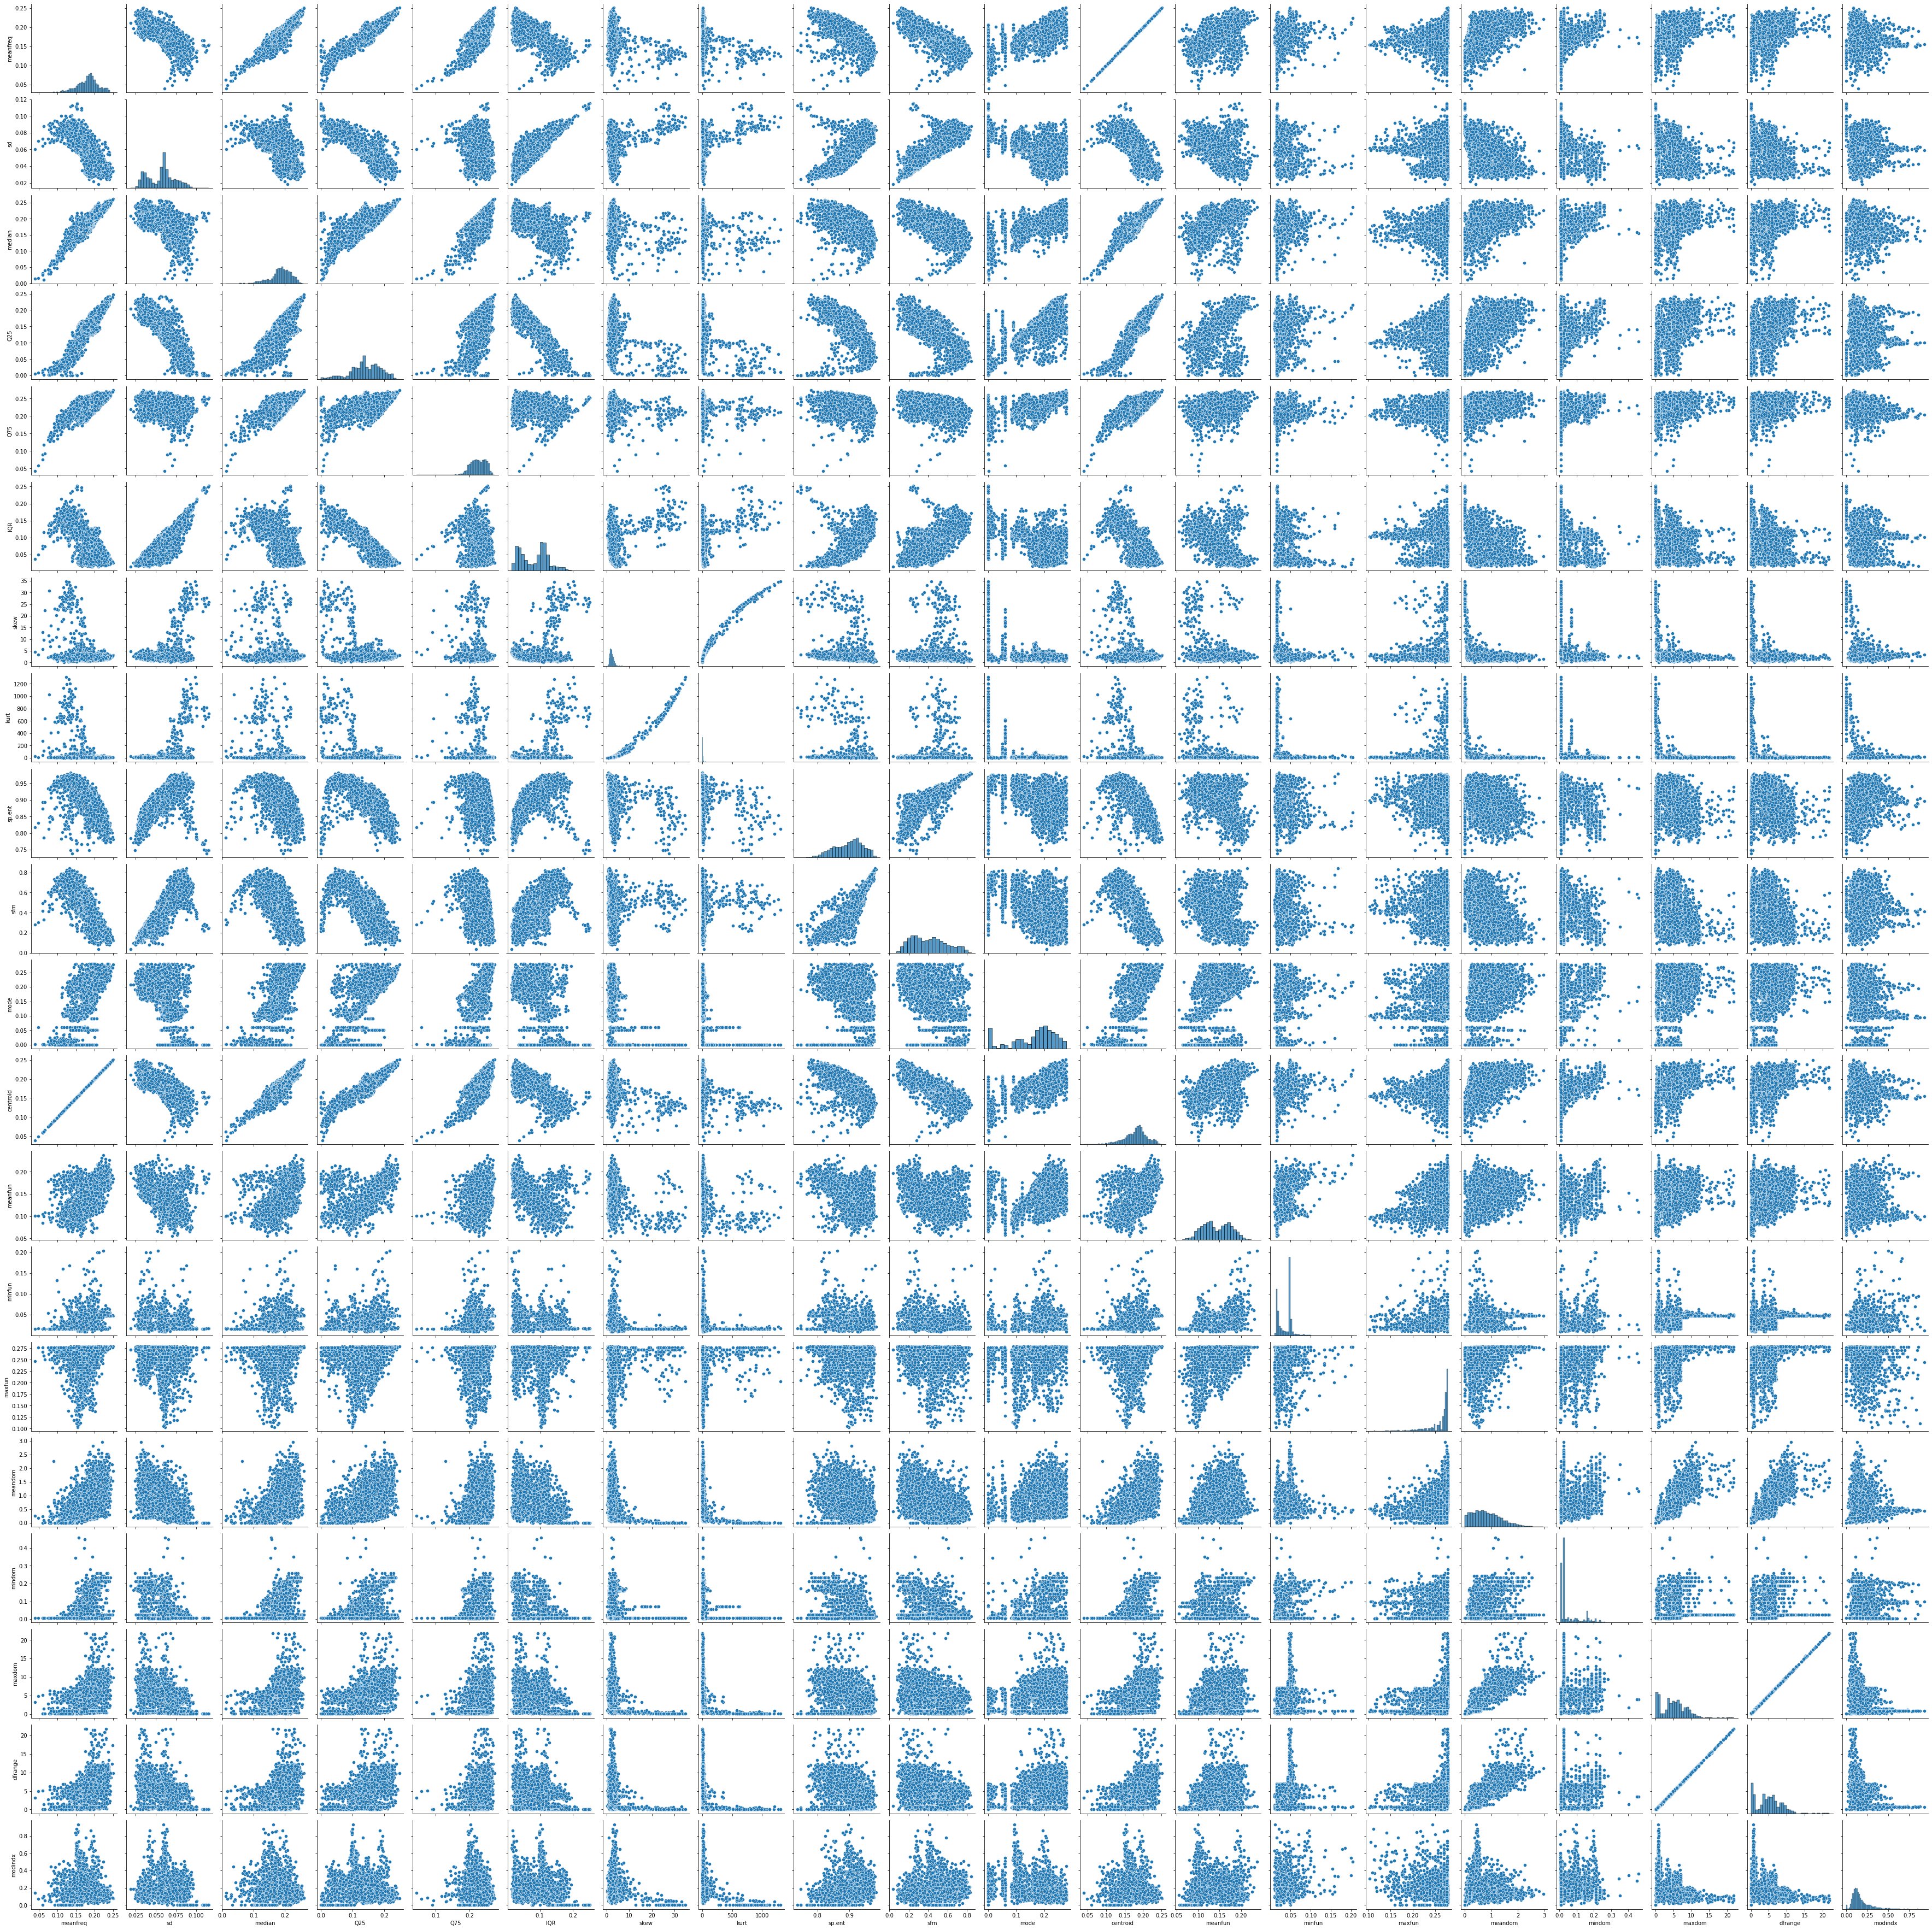

In [14]:
sns.pairplot(data= df)

#### From above figure we can say that most of datapoints are  not linearly co- related with each other

###  Statistical Summary of data

In [15]:
df.describe()

meanfreq           sd       median          Q25          Q75  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.180886     0.057130     0.185593     0.140440     0.224748   
std       0.029916     0.016656     0.036354     0.048687     0.023636   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163649     0.041942     0.169578     0.111086     0.208740   
50%       0.184814     0.059162     0.190016     0.140255     0.225668   
75%       0.199118     0.067023     0.210588     0.175931     0.243640   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.084308     3.140895    36.587139     0.895144     0.408348   
std       0.042790     4.241768   134.969236     0.044988     0.177476   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042538     1.649353     5.666817     0.861823     0.258126   
50%       0.094280     2.197623     8.327893     0.901823     0.396472   
75%       0.114168     2.932527    13.649803     0.928717     0.533795   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000   
mean      0.165248     0.180886     0.142811     0.036801     0.258837   
std       0.077212     0.029916     0.032314     0.019225     0.030085   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118008     0.163649     0.116990     0.018223     0.253968   
50%       0.186530     0.184814     0.140585     0.046110     0.271186   
75%       0.221070     0.199118     0.169605     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3166.000000  3166.000000  3166.000000  3166.000000  3166.000000  
mean      0.828868     0.052631     5.044220     4.991589     0.173751  
std       0.525009     0.063301     3.517226     3.516072     0.119484  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419640     0.007812     2.070312     2.041016     0.099726  
50%       0.765625     0.023438     4.992188     4.945312     0.139357  
75%       1.176824     0.070312     7.005859     6.992188     0.209141  
max       2.957682     0.458984    21.867188    21.843750     0.932374

### Finding the correlation between variables

Text(0.5, 1.0, 'Pearson Correlation')

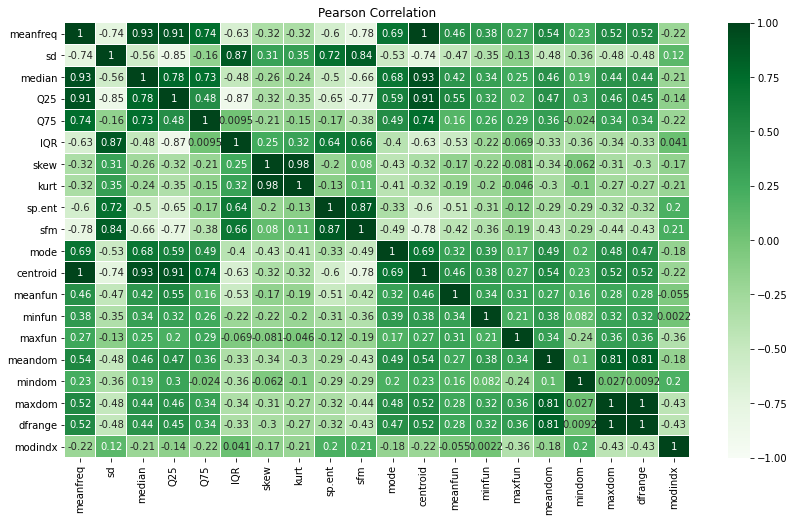

In [16]:
pearsonCorr = df.corr(method='pearson')
spearmanCorr = df.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

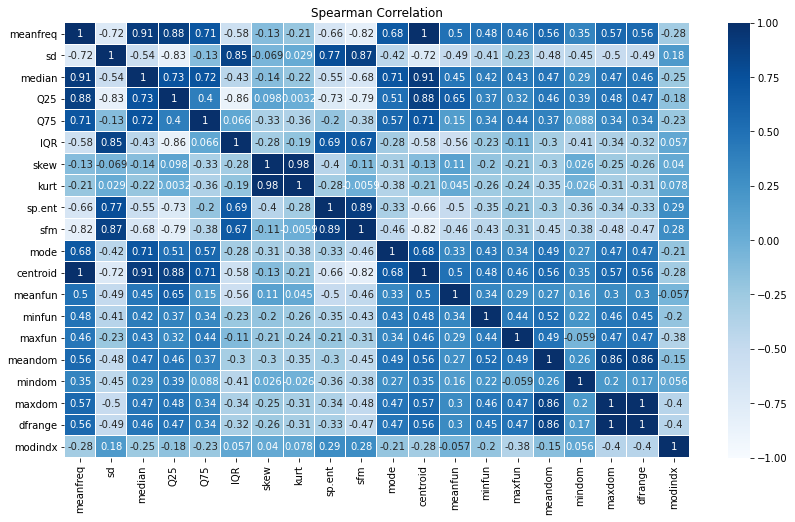

In [17]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

In [18]:
df.label.unique()

array(['male', 'female'], dtype=object)

### Value count of target variable

In [19]:
df.label.value_counts()

female    1583
male      1583
Name: label, dtype: int64

#### Thus we can see there are equal number of male and female labels

### Label Encoding

In [20]:
le = LabelEncoder()
df['label'] =le.fit_transform(df['label'])
 

In [21]:
df.label.unique()

array([1, 0])

### Model Building

In [22]:
X =df.drop(['label'], axis =1)
Y = df['label']

### Data  Standardisation


In [23]:
scaler = StandardScaler()

In [24]:
X = scaler.fit_transform(X)


In [25]:
X =pd.DataFrame(X,columns=df.columns[:-1])
X.head()

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -4.048763  0.427014 -4.224894 -2.575370 -5.693565 -0.214711  2.292464   
1 -3.840558  0.611291 -3.999247 -2.486167 -5.588933 -0.258411  4.546556   
2 -3.462553  1.603266 -4.095821 -2.706234 -3.928446  0.909211  6.511582   
3 -0.991527  0.899560 -0.758836 -0.900952 -0.710567  0.632620 -0.449899   
4 -1.530036  1.322037 -1.676492 -1.267871 -0.791400  1.005458 -0.480942   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  1.762278 -0.039446  0.470952 -2.140524 -4.048763 -1.811609 -1.097704   
1  4.431537 -0.065595  0.593839 -2.140524 -3.840558 -1.079386 -1.091241   
2  7.323867 -1.083891  0.397619 -2.140524 -3.462553 -1.365073 -1.100102   
3 -0.240166  1.515717  1.797051 -1.054015 -0.991527 -1.666580 -0.988666   
4 -0.239006  1.707634  2.114531 -0.789983 -1.530036 -1.127011 -1.033737   

     maxfun   meandom   mindom    maxdom   dfrange   modindx  
0  0.565984 -1.564135 -0.70813 -1.432152 -1.419874 -1.454399  
1 -0.293799 -1.561845 -0.70813 -1.418823 -1.406540 -1.013840  
2  0.410543 -1.563797 -0.70813 -1.429931 -1.417651 -1.065068  
3 -0.293799 -1.195160 -0.70813 -1.274421 -1.262091  0.614139  
4  0.260283 -0.221089 -0.70813  0.125163  0.137952  0.288981

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2532, 20), (634, 20), (2532,), (634,))

In [50]:
svm = SVC(probability=True)# default parameter
svm.fit(X_train,y_train)

SVC(probability=True)

In [51]:
svm.score(X_train,y_train)

0.9849921011058452

In [52]:
svm.score(X_test,y_test)

0.9842271293375394

In [53]:
kernel = ['linear','rbf','poly','sigmoid']
for kernel in kernel:
    svc=SVC(kernel=kernel)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print(kernel)
    print('Trainig Accuracy Score: ', svc.score(X_train,y_train))
    print('Testing Accuracy Score: ', svc.score(X_test,y_test))
    print('*'*35)

linear
Trainig Accuracy Score:  0.9774881516587678
Testing Accuracy Score:  0.9747634069400631
***********************************
rbf
Trainig Accuracy Score:  0.9849921011058452
Testing Accuracy Score:  0.9842271293375394
***********************************
poly
Trainig Accuracy Score:  0.967219589257504
Testing Accuracy Score:  0.9621451104100947
***********************************
sigmoid
Trainig Accuracy Score:  0.7930489731437599
Testing Accuracy Score:  0.8123028391167192
***********************************


#### From above result we can say that svm with rbf kernal which is defult kernal works better and give 98% of accuracy

In [54]:
Cval= [0.0001, 0.001, 0.01, 0.1, 1]
for c in Cval:
    svc=SVC(kernel='rbf',C  = c)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print(c)
    print('Trainig Accuracy Score: ', svc.score(X_train,y_train))
    print('Testing Accuracy Score: ', svc.score(X_test,y_test))
    print('*'*35)


0.0001
Trainig Accuracy Score:  0.5059241706161137
Testing Accuracy Score:  0.47634069400630913
***********************************
0.001
Trainig Accuracy Score:  0.5059241706161137
Testing Accuracy Score:  0.47634069400630913
***********************************
0.01
Trainig Accuracy Score:  0.8961295418641391
Testing Accuracy Score:  0.9132492113564669
***********************************
0.1
Trainig Accuracy Score:  0.9703791469194313
Testing Accuracy Score:  0.973186119873817
***********************************
1
Trainig Accuracy Score:  0.9849921011058452
Testing Accuracy Score:  0.9842271293375394
***********************************


#### From above result we can say that C= 1 which is default value of C gives highest accuracy of 98%

### Predict of Train Dataset

In [55]:
y_pred_train = svm.predict(X_train)
Accuracy_train=metrics.accuracy_score(y_train,y_pred_train )
precision_train=metrics.precision_score(y_train,y_pred_train)
recall_train=metrics.recall_score(y_train,y_pred_train)
f1_score_train=metrics.f1_score(y_train,y_pred_train)
roc_auc_train=metrics.roc_auc_score(y_train,y_pred_train)

In [56]:
print("Model Name = SVM")
print("Accuracy is =",Accuracy_train)
print("Precision score is =",precision_train)
print("Recall score = ",recall_train)
print("f1 SCore score is = ",f1_score_train)
print("Roc_Auc score is= ",roc_auc_train)

Model Name = SVM
Accuracy is = 0.9849921011058452
Precision score is = 0.9902991107518189
Recall score =  0.9792166266986411
f1 SCore score is =  0.9847266881028938
Roc_Auc score is=  0.984924472599906


### Predict on X_test

In [57]:
y_pred_test = svm.predict(X_test)
Accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
precision_test=metrics.precision_score(y_test,y_pred_test)
recall_test=metrics.recall_score(y_test,y_pred_test)
f1_score_test=metrics.f1_score(y_test,y_pred_test)
roc_auc_test=metrics.roc_auc_score(y_test,y_pred_test)

In [58]:
print("Model Name = SVM")
print("Accuracy is ",Accuracy_test)
print("Precision score is ",precision_test)
print("Recall _score is",recall_test)
print("f1 SCore score is ",f1_score_test)
print("Roc_Auc score is",roc_auc_test)

Model Name = SVM
Accuracy is  0.9842271293375394
Precision score is  0.9878787878787879
Recall _score is 0.9819277108433735
f1 SCore score is  0.9848942598187311
Roc_Auc score is 0.9843413388653954


### Confusion Matrix

In [59]:
label=['No','Yes']

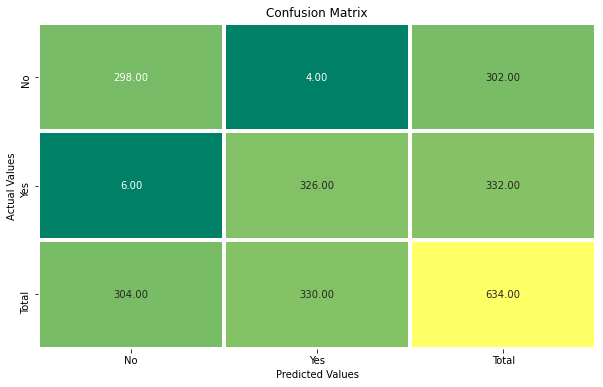

In [60]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred_test)
row_sum = cm.sum(axis=0)
cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
col_sum = cm.sum(axis=1)
cm = np.append(cm,col_sum.reshape(-1,1),axis=1)
labels = label+['Total']
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
yticklabels=labels,linewidths=3,cbar=None,)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()


### Classification Report

In [61]:
print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
cr = classification_report(y_test,y_pred)
print(cr)


******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       302
           1       0.99      0.98      0.98       332

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### Conclusion

### Thus we have successfully completed the implementation of Support Vector Machine  Classifier on Voice dataset with 98% accuracy